# Inferência Estatística (GCC1625) - Trabalho 4
- Nome completo: ANA CAROLINA SÁ COELHO DA SILVA
- Link para o vídeo:

# (1) GLMs- Regressão Logística (2,5 pts)

A regressão logística é uma ferramenta fundamental na modelagem de variáveis categóricas binárias. Neste item avaliativo, você aplicará esse modelo para identificar fatores associados à sobrevivência de passageiros no naufrágio do Titanic.

### Dados

Utilize o seguinte conjunto de dados:
- Dataset: Titanic Dataset
- Descrição: Informações sobre passageiros do Titanic, incluindo idade, sexo, classe, número de familiares a bordo, entre outros. A variável res
posta ‘Survived‘ indica se o passageiro sobreviveu (1) ou não (0).

In [4]:
# codigo para trazer os dados
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import numpy as np

#dataset do seaborn
df = sns.load_dataset("titanic")

#colunas relevantes
df = df[['survived', 'sex', 'pclass', 'age', 'sibsp']]

#limpeza
df = df.dropna()

#categorização
df['sex'] = df['sex'].map({'male': 0, 'female': 1})


**Explicação:**

### Tarefas
1. Ajustar um modelo de regressão logística para prever Survived, utilizando pelo menos três variáveis explicativas: Sex, Pclass, Age, SibSp, ou outras de sua escolha.

In [2]:
# 1
# Variáveis independentes (com constante)
X = df[['sex', 'pclass', 'age', 'sibsp']]
X = sm.add_constant(X)

# Variável dependente
y = df['survived']

# Ajuste do modelo
modelo = sm.Logit(y, X).fit()
print(modelo.summary())


Optimization terminated successfully.
         Current function value: 0.445882
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      709
Method:                           MLE   Df Model:                            4
Date:                Mon, 30 Jun 2025   Pseudo R-squ.:                  0.3399
Time:                        23:40:24   Log-Likelihood:                -318.36
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 1.089e-69
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9774      0.486      6.130      0.000       2.025       3.929
sex            2.6235      0.

**Explicação:**

2. Interpretar os coeficientes estimados, com especial atenção para o significado de sinais positivos e negativos em termos da chance de sobrevivência.


In [5]:
# 2
# Exponenciar coeficientes para obter odds ratio
odds_ratios = pd.Series(modelo.params).apply(lambda x: round(np.exp(x), 2))
print("Odds Ratios:")
print(odds_ratios)



Odds Ratios:
const     19.64
sex       13.78
pclass     0.27
age        0.96
sibsp      0.69
dtype: float64


**Explicação:** Interpretação:

Coeficiente positivo → aumenta a chance de sobrevivência.

Coeficiente negativo → diminui a chance de sobrevivência.

Ex: sex = 1 (female) com coeficiente positivo indica que mulheres têm maior chance de sobreviver.

3. Avaliar a significância estatística dos coeficientes e discutir quais variáveis possuem maior impacto na predição.


In [ ]:
# 3 



4. Calcular a probabilidade estimada de sobrevivência para um passageiro do sexo feminino, 25 anos, na 1ª classe, viajando sozinho.


In [6]:
# 4 
# Passageira: mulher (1), 25 anos, 1ª classe, 0 irmãos/cônjuges a bordo
nova_passageira = pd.DataFrame({
    'const': [1],
    'sex': [1],
    'pclass': [1],
    'age': [25],
    'sibsp': [0]
})

# Calcular probabilidade
prob = modelo.predict(nova_passageira)[0]
print(f"Probabilidade estimada de sobrevivência: {prob:.2%}")


Probabilidade estimada de sobrevivência: 95.98%


**Explicação:**


5. Avaliar o desempenho do modelo com métricas como acurácia, precisão, recall e matriz de confusão.


In [7]:
#5
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Separar dados
X_train, X_test, y_train, y_test = train_test_split(X.drop('const', axis=1), y, test_size=0.3, random_state=42)

# Modelo com sklearn
modelo_sklearn = LogisticRegression()
modelo_sklearn.fit(X_train, y_train)
y_pred = modelo_sklearn.predict(X_test)

# Métricas
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Precisão:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))


Acurácia: 0.786046511627907
Precisão: 0.7654320987654321
Recall: 0.6966292134831461
Matriz de Confusão:
 [[107  19]
 [ 27  62]]


**Explicação:**


6. Verificar graficamente se há padrões nos resíduos de Pearson que indiquem problemas de ajuste.

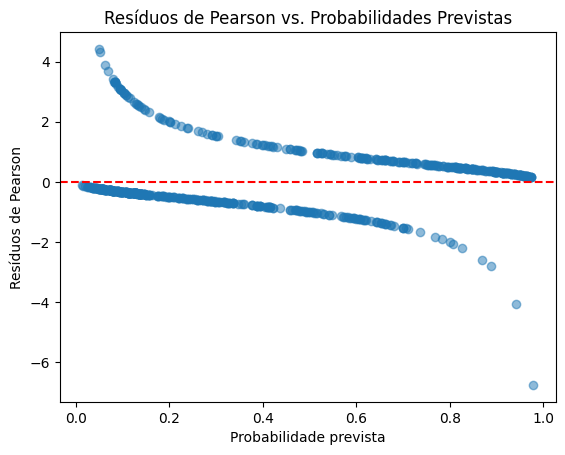

In [8]:
# 6
import matplotlib.pyplot as plt
import numpy as np

# Resíduos de Pearson
pred_probs = modelo.predict(X)
residuos = (y - pred_probs) / np.sqrt(pred_probs * (1 - pred_probs))

# Gráfico dos resíduos vs predições
plt.scatter(pred_probs, residuos, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Probabilidade prevista")
plt.ylabel("Resíduos de Pearson")
plt.title("Resíduos de Pearson vs. Probabilidades Previstas")
plt.show()


**Explicação:**